### Importación de datos



In [58]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [59]:
tiendas = [tienda1,tienda2,tienda3,tienda4]
Facturacion_por_tienda = []
Nombres_tiendas = []

for i, tienda in enumerate(tiendas, start=1):
  Precio = sum(tienda["Precio"].tolist())
  Facturacion_por_tienda.append(Precio)
  Nombres_tiendas.append(f"Tienda {i}")

Facturacion_por_tienda = dict(zip(Nombres_tiendas, Facturacion_por_tienda))
for clave, valor in Facturacion_por_tienda.items():
  print(f"La facturación de la {clave}: ${valor}")

La facturación de la Tienda 1: $1150880400.0
La facturación de la Tienda 2: $1116343500.0
La facturación de la Tienda 3: $1098019600.0
La facturación de la Tienda 4: $1038375700.0


# 2. Ventas por categoría

In [60]:
def ventas_por_categoria(tienda):
  Productos_vendidos = tienda["Categoría del Producto"].tolist()
  Tipos_productos = []
  Ventas_por_tipo = []

  for Producto in Productos_vendidos:
    if Producto not in Tipos_productos:
      Tipos_productos.append(Producto)

  for tipo in Tipos_productos:
    cantidad = Productos_vendidos.count(tipo)
    Ventas_por_tipo.append(cantidad)

  Relacion_cantidad_productos = dict(zip(Tipos_productos, Ventas_por_tipo))
  Relacion_cantidad_producto_odenada = dict(sorted(Relacion_cantidad_productos.items(), key=lambda x: x[0]))
  return Relacion_cantidad_producto_odenada

for i, tienda in enumerate(tiendas):
    print(f"{Nombres_tiendas[i]} - Ventas por categoría:\n{ventas_por_categoria(tienda)}\n")

Tienda 1 - Ventas por categoría:
{'Artículos para el hogar': 171, 'Deportes y diversión': 284, 'Electrodomésticos': 312, 'Electrónicos': 448, 'Instrumentos musicales': 182, 'Juguetes': 324, 'Libros': 173, 'Muebles': 465}

Tienda 2 - Ventas por categoría:
{'Artículos para el hogar': 181, 'Deportes y diversión': 275, 'Electrodomésticos': 305, 'Electrónicos': 422, 'Instrumentos musicales': 224, 'Juguetes': 313, 'Libros': 197, 'Muebles': 442}

Tienda 3 - Ventas por categoría:
{'Artículos para el hogar': 177, 'Deportes y diversión': 277, 'Electrodomésticos': 278, 'Electrónicos': 451, 'Instrumentos musicales': 177, 'Juguetes': 315, 'Libros': 185, 'Muebles': 499}

Tienda 4 - Ventas por categoría:
{'Artículos para el hogar': 201, 'Deportes y diversión': 277, 'Electrodomésticos': 254, 'Electrónicos': 451, 'Instrumentos musicales': 170, 'Juguetes': 338, 'Libros': 187, 'Muebles': 480}



# 3. Calificación promedio de la tienda


In [61]:
Calificaciones_por_tienda = []

for i, tienda in enumerate(tiendas, start=1):
  Calificacion = tienda["Calificación"].tolist()
  Promedio = round(sum(Calificacion)/len(Calificacion),2)
  Calificaciones_por_tienda.append(Promedio)

Calificaciones_por_tienda = dict(zip(Nombres_tiendas, Calificaciones_por_tienda))

for clave, valor in Calificaciones_por_tienda.items():
  print(f"{clave} - Valoración media: {valor}")


Tienda 1 - Valoración media: 3.98
Tienda 2 - Valoración media: 4.04
Tienda 3 - Valoración media: 4.05
Tienda 4 - Valoración media: 4.0


# 4. Productos más y menos vendidos

In [62]:
def Productos_mas_y_menos_vendidos(tienda):
  Productos_vendidos = tienda["Categoría del Producto"].tolist()
  Tipos_productos = []
  Ventas_por_tipo = []

  for Producto in Productos_vendidos:
    if Producto not in Tipos_productos:
      Tipos_productos.append(Producto)

  for tipo in Tipos_productos:
    cantidad = Productos_vendidos.count(tipo)
    Ventas_por_tipo.append(cantidad)

  Relacion_cantidad_productos = dict(zip(Tipos_productos, Ventas_por_tipo))

  mas_vendido = max(Relacion_cantidad_productos, key=Relacion_cantidad_productos.get)
  menos_vendido = min(Relacion_cantidad_productos, key=Relacion_cantidad_productos.get)

  return mas_vendido, menos_vendido, Relacion_cantidad_productos



for i, tienda in enumerate(tiendas):
    mas_vendido, menos_vendido, Relacion_cantidad_productos = Productos_mas_y_menos_vendidos(tienda)
    print(
        f"{Nombres_tiendas[i]}:\n"
        f"Producto más vendido: {mas_vendido} ({Relacion_cantidad_productos[mas_vendido]} unidades)\n"
        f"Producto menos vendido: {menos_vendido} ({Relacion_cantidad_productos[menos_vendido]} unidades)\n"
    )

Tienda 1:
Producto más vendido: Muebles (465 unidades)
Producto menos vendido: Artículos para el hogar (171 unidades)

Tienda 2:
Producto más vendido: Muebles (442 unidades)
Producto menos vendido: Artículos para el hogar (181 unidades)

Tienda 3:
Producto más vendido: Muebles (499 unidades)
Producto menos vendido: Instrumentos musicales (177 unidades)

Tienda 4:
Producto más vendido: Muebles (480 unidades)
Producto menos vendido: Instrumentos musicales (170 unidades)



# 5. Envío promedio por tienda

In [63]:
Costo_envio_prom_tienda = []

for i, tienda in enumerate(tiendas, start=1):
  Costo_de_envio = tienda["Costo de envío"].tolist()
  Promedio = round(sum(Costo_de_envio)/len(Costo_de_envio),2)
  Costo_envio_prom_tienda.append(Promedio)

Costo_envio_prom_tienda = dict(zip(Nombres_tiendas, Costo_envio_prom_tienda))

for clave, valor in Costo_envio_prom_tienda.items():
  print(f"{clave} - Costo de envío promedio: ${valor}")

Tienda 1 - Costo de envío promedio: $26018.61
Tienda 2 - Costo de envío promedio: $25216.24
Tienda 3 - Costo de envío promedio: $24805.68
Tienda 4 - Costo de envío promedio: $23459.46


# 6. Visualización de los datos

### **Gráfico de barras: Ingreso total por tienda**

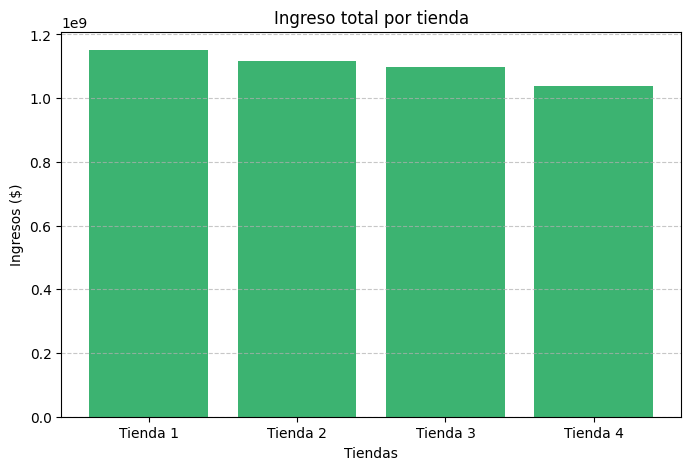

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(Facturacion_por_tienda.keys(), Facturacion_por_tienda.values(), color='mediumseagreen')
plt.title("Ingreso total por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Ingresos ($)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Gráfico de líneas: Valoración media**

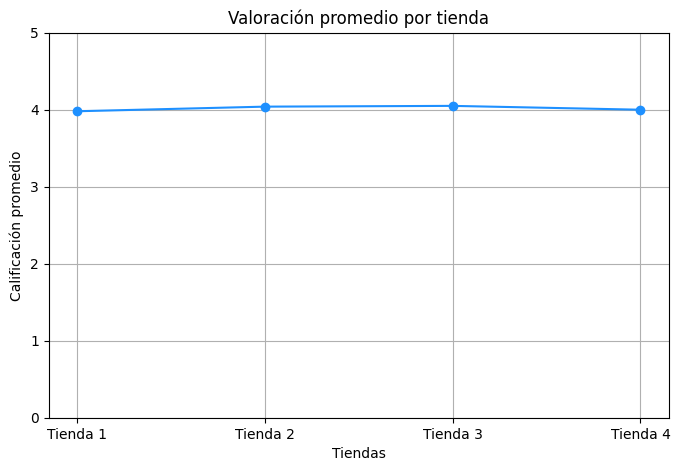

In [65]:
plt.figure(figsize=(8,5))
plt.plot(Calificaciones_por_tienda.keys(), Calificaciones_por_tienda.values(), marker='o', color='dodgerblue', linestyle='-')
plt.title("Valoración promedio por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Calificación promedio")
plt.ylim(0, 5)
plt.grid(True)
plt.show()


### **gráfico de torta: Costo de envío promedio por tienda**

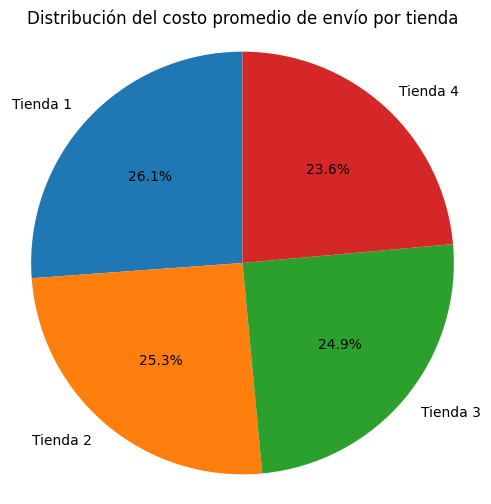

In [66]:
plt.figure(figsize=(6,6))
plt.pie(
    Costo_envio_prom_tienda.values(),
    labels=Costo_envio_prom_tienda.keys(),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribución del costo promedio de envío por tienda")
plt.axis('equal')
plt.show()
